# Data Aggreation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# load data
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

In [7]:
df[df['cut'] == 'Ideal']

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


In [11]:
condition = df['cut'] == 'Ideal'
df.loc[condition]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


In [13]:
df.loc[condition]['color'].value_counts()

G    4884
E    3903
F    3826
H    3115
D    2834
I    2093
J     896
Name: color, dtype: int64

In [24]:
df.groupby('cut')['color']

In [25]:
df.groupby('cut')['color'].value_counts()

cut         
Ideal      G    4884
           E    3903
           F    3826
           H    3115
           D    2834
           I    2093
           J     896
Premium    G    2924
           H    2360
           E    2337
           F    2331
           D    1603
           I    1428
           J     808
Very Good  E    2400
           G    2299
           F    2164
           H    1824
           D    1513
           I    1204
           J     678
Good       E     933
           F     909
           G     871
           H     702
           D     662
           I     522
           J     307
Fair       G     314
           F     312
           H     303
           E     224
           I     175
           D     163
           J     119
Name: color, dtype: int64

In [26]:
cutGroups = df.groupby('cut')
cutGroups

In [27]:
cutGroups['color'].value_counts()

cut         
Ideal      G    4884
           E    3903
           F    3826
           H    3115
           D    2834
           I    2093
           J     896
Premium    G    2924
           H    2360
           E    2337
           F    2331
           D    1603
           I    1428
           J     808
Very Good  E    2400
           G    2299
           F    2164
           H    1824
           D    1513
           I    1204
           J     678
Good       E     933
           F     909
           G     871
           H     702
           D     662
           I     522
           J     307
Fair       G     314
           F     312
           H     303
           E     224
           I     175
           D     163
           J     119
Name: color, dtype: int64

In [28]:
# find the color frequencies of the Ideal cut of diamonds after forming the group of 'cut's
cutGroups.get_group('Ideal')['color'].value_counts()

G    4884
E    3903
F    3826
H    3115
D    2834
I    2093
J     896
Name: color, dtype: int64

In [31]:
cutGroups['color'].value_counts().loc['Ideal']

G    4884
E    3903
F    3826
H    3115
D    2834
I    2093
J     896
Name: color, dtype: int64

In [32]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [33]:
# find the highest and lowest price of Premimum cut of diamonds after forming the group of cut
cutGroups.get_group('Premium')['price'].agg([np.min,np.max])

amin      326
amax    18823
Name: price, dtype: int64

In [34]:
cutGroups['price'].min().loc['Premium']

326

In [35]:
cutGroups['price'].max().loc['Premium']

18823

In [36]:
cutGroups['price'].agg(['min', 'max']).loc['Premium']

min      326
max    18823
Name: Premium, dtype: int64

In [37]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [42]:
df.loc[df['cut']=='Premium']['clarity'].str.contains('VS').sum()

6832

In [45]:
# find the number of Premium cut of diamonds of VS clarity (after forming the group of cut)
cutGroups.get_group('Premium')[cutGroups.get_group('Premium')['clarity'].str.contains('VS')].shape[0]

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
26,0.24,Premium,I,VS1,62.5,57.0,355,3.97,3.94,2.47
53,0.22,Premium,E,VS2,61.6,58.0,404,3.93,3.89,2.41
54,0.22,Premium,D,VS2,59.3,62.0,404,3.91,3.88,2.31
69,0.24,Premium,E,VVS1,60.7,58.0,553,4.01,4.03,2.44
...,...,...,...,...,...,...,...,...,...,...
53872,0.74,Premium,H,VS1,60.6,60.0,2744,5.91,5.84,3.56
53880,0.73,Premium,G,VS2,60.7,58.0,2746,5.82,5.87,3.55
53901,0.57,Premium,E,VS1,61.6,58.0,2753,5.36,5.33,3.29
53912,0.61,Premium,F,VVS1,61.8,59.0,2753,5.48,5.40,3.36


In [46]:
grouped = df[df['cut']=='Premium']
grouped['clarity'].str.contains('VS').sum()

6832

In [47]:
cutGroups.get_group('Premium')['clarity'].str.contains('VS').sum()

6832

In [48]:
cutGroups['clarity'].str.contains('VS').sum()

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [49]:
# apply()
cutGroups['clarity'].apply(lambda x: x.str.contains('VS').sum())

cut
Ideal        13313
Premium       6832
Very Good     6390
Good          2098
Fair           517
Name: clarity, dtype: int64

In [51]:
cutGroups['clarity'].apply(lambda x: x.str.contains('VS').sum()).loc['Premium']

6832

In [52]:
cutGroups['price'].median()

cut
Ideal        1810.0
Premium      3185.0
Very Good    2648.0
Good         3050.5
Fair         3282.0
Name: price, dtype: float64

In [53]:
df.loc[0:5, 'price'] = np.nan
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,NaN,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,NaN,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,NaN,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [54]:
cutGroups

In [56]:
# fill the missing values of the price by the group specific mean value
findMean = lambda x: x.fillna(x.mean())
cutGroups['price'].apply(findMean)

0        3457.687285
1        4584.874755
2        3930.331770
3        4584.874755
4        3930.331770
            ...     
53935    2757.000000
53936    2757.000000
53937    2757.000000
53938    2757.000000
53939    2757.000000
Name: price, Length: 53940, dtype: float64

In [57]:
df = sns.load_dataset('diamonds')
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [59]:
df.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770


In [60]:
df.pivot_table(index = 'cut')

,carat,depth,price,table,x,y,z
cut,,,,,,,
Ideal,0.702837,61.709401,3457.541970,55.951668,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,4584.257704,58.746095,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,3981.759891,57.956150,5.740696,5.770026,3.559801
Good,0.849185,62.365879,3928.864452,58.694639,5.838785,5.850744,3.639507
Fair,1.046137,64.041677,4358.757764,59.053789,6.246894,6.182652,3.982770


In [61]:
df.groupby('cut')[['depth', 'price']].mean()

,depth,price
cut,,
Ideal,61.709401,3457.541970
Premium,61.264673,4584.257704
Very Good,61.818275,3981.759891
Good,62.365879,3928.864452
Fair,64.041677,4358.757764


In [63]:
df.pivot_table(index = 'cut', values = ['depth', 'price'], aggfunc = 'mean')

,depth,price
cut,,
Ideal,61.709401,3457.541970
Premium,61.264673,4584.257704
Very Good,61.818275,3981.759891
Good,62.365879,3928.864452
Fair,64.041677,4358.757764


In [65]:
df.groupby(['cut', 'clarity'])[['depth', 'price']].mean()

depth        price
cut       clarity                        
Ideal     IF       61.645710  2272.913366
          VVS1     61.679091  2468.129458
          VVS2     61.690714  3250.290100
          VS1      61.706436  3489.744497
          VS2      61.730901  3284.550385
          SI1      61.737482  3752.118169
          SI2      61.701001  4755.952656
          I1       61.648630  4335.726027
Premium   IF       61.047826  3856.143478
          VVS1     61.260877  2831.206169
          VVS2     61.280230  3795.122989
          VS1      61.318451  4485.462041
          VS2      61.283408  4550.331248
          SI1      61.303329  4455.269371
          SI2      61.178976  5545.936928
          I1       61.183415  3947.331707
Very Good IF       61.363806  4396.216418
          VVS1     61.675919  2459.441065
          VVS2     61.660972  3037.765182
          VS1      61.729127  3805.353239
          VS2      61.849247  4215.759552
          SI1      61.947222  3932.391049
          SI2      61.862952  4988.688095
          I1       61.755952  4078.226190
Good      IF       61.440845  4098.323944
          VVS1     62.123118  2254.774194
          VVS2     62.311538  3079.108392
          VS1      62.018673  3801.445988
          VS2      62.363292  4262.236196
          SI1      62.696346  3689.533333
          SI2      62.242831  4580.260870
          I1       62.067708  3596.635417
Fair      IF       60.066667  1912.333333
          VVS1     60.417647  3871.352941
          VVS2     62.847826  3349.768116
          VS1      62.945294  4165.141176
          VS2      63.637548  4174.724138
          SI1      63.910294  4208.279412
          SI2      64.421888  5173.916309
          I1       65.699048  3703.533333

In [66]:
df.pivot_table(index = ['cut', 'clarity'], values = ['depth', 'price'])

depth        price
cut       clarity                        
Ideal     IF       61.645710  2272.913366
          VVS1     61.679091  2468.129458
          VVS2     61.690714  3250.290100
          VS1      61.706436  3489.744497
          VS2      61.730901  3284.550385
          SI1      61.737482  3752.118169
          SI2      61.701001  4755.952656
          I1       61.648630  4335.726027
Premium   IF       61.047826  3856.143478
          VVS1     61.260877  2831.206169
          VVS2     61.280230  3795.122989
          VS1      61.318451  4485.462041
          VS2      61.283408  4550.331248
          SI1      61.303329  4455.269371
          SI2      61.178976  5545.936928
          I1       61.183415  3947.331707
Very Good IF       61.363806  4396.216418
          VVS1     61.675919  2459.441065
          VVS2     61.660972  3037.765182
          VS1      61.729127  3805.353239
          VS2      61.849247  4215.759552
          SI1      61.947222  3932.391049
          SI2      61.862952  4988.688095
          I1       61.755952  4078.226190
Good      IF       61.440845  4098.323944
          VVS1     62.123118  2254.774194
          VVS2     62.311538  3079.108392
          VS1      62.018673  3801.445988
          VS2      62.363292  4262.236196
          SI1      62.696346  3689.533333
          SI2      62.242831  4580.260870
          I1       62.067708  3596.635417
Fair      IF       60.066667  1912.333333
          VVS1     60.417647  3871.352941
          VVS2     62.847826  3349.768116
          VS1      62.945294  4165.141176
          VS2      63.637548  4174.724138
          SI1      63.910294  4208.279412
          SI2      64.421888  5173.916309
          I1       65.699048  3703.533333

In [68]:
dataForViz = df.pivot_table(index = 'cut', columns = 'color', values = 'price' )
dataForViz

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462


<AxesSubplot:xlabel='color', ylabel='cut'>

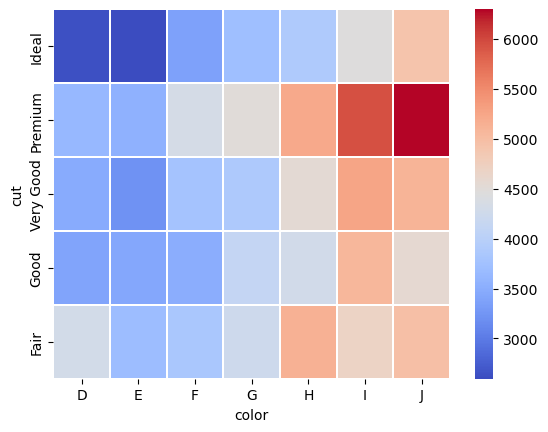

In [74]:
sns.heatmap(dataForViz, linewidth = 0.3, linecolor = 'white', cmap = 'coolwarm')

In [75]:
df.groupby(['cut', 'color'])['price'].mean()

cut        color
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Fair       D        4291.061350
           E        3682.312500
           F        382

In [77]:
dataForHeatmap = df.groupby(['cut', 'color'])['price'].mean().unstack()
dataForHeatmap

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462


<AxesSubplot:xlabel='color', ylabel='cut'>

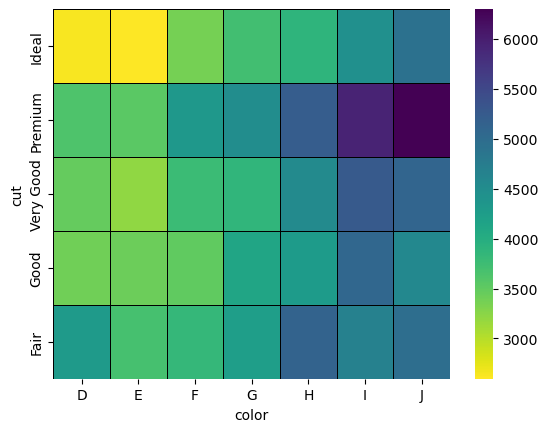

In [80]:
sns.heatmap(dataForHeatmap, linewidth = 0.5, linecolor = 'black', cmap = 'viridis_r')